In [101]:
from sagemaker import get_execution_role
import boto3
import pandas as pd
import io
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

role = get_execution_role()

bucket = 'projeto-integrador-grupo-b-refined'
subfolder = 'amostra-treinamento/'
full_df=pd.DataFrame()


conn = boto3.client('s3')
contents = conn.list_objects(Bucket=bucket, Prefix=subfolder)['Contents']
for f in contents:
    response = conn.get_object(Bucket=bucket, Key=f['Key'])
    body = response['Body']
    df = pd.read_parquet(io.BytesIO(body.read()))
    full_df=full_df.append(df,ignore_index=True)

/tmp/ipykernel_153/3341942532.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df=full_df.append(df,ignore_index=True)
/tmp/ipykernel_153/3341942532.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df=full_df.append(df,ignore_index=True)


In [102]:
print(full_df)

      Fwd_IAT_Max Fwd_Act_Data_Pkts Fwd_Header_Len Bwd_Pktsb_Avg  \
0        86926433                 0             40             0   
1       2572449.0                 5            212             0   
2               0                 0              8             0   
3               0                 0              8             0   
4          110426                 1             16             0   
...           ...               ...            ...           ...   
19995         277                 1             72             0   
19996     4037511                 0             40             0   
19997    3.38E+07                 0             40             0   
19998    3.82E+07                 0             40             0   
19999         504                 0             40             0   

            Bwd_IAT_Mean Idle_Std Bwd_IAT_Tot           Fwd_Pktss Active_Min  \
0                      0        0           0        0.0230079612          0   
1      738595.333333333

In [103]:
colunas = list(full_df)

colunas.remove("Timestamp")
colunas.remove("Label")
colunas.remove("anomesdia")

In [104]:
full_df['IsBenign'].value_counts()

1    10000
0    10000
Name: IsBenign, dtype: int64

In [105]:
df_convert = full_df[colunas].astype(np.float32)

In [106]:
df_convert.describe()

,Fwd_IAT_Max,Fwd_Act_Data_Pkts,Fwd_Header_Len,Bwd_Pktsb_Avg,Bwd_IAT_Mean,Idle_Std,Bwd_IAT_Tot,Fwd_Pktss,Active_Min,Subflow_Bwd_Byts,...,Subflow_Fwd_Pkts,Pkt_Len_Min,ACK_Flag_Cnt,Init_Bwd_Win_Byts,Bwd_Header_Len,Bwd_IAT_Std,Fwd_Seg_Size_Min,Pkt_Size_Avg,Fwd_URG_Flags,Bwd_Pkt_Len_Min
count,20000.0,20000.000000,2.000000e+04,20000.0,2.000000e+04,2.000000e+04,20000.0,2.000000e+04,2.000000e+04,2.000000e+04,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,5700513.0,15.557450,2.135112e+02,0.0,4.891741e+05,9.890381e+04,4343607.0,6.666416e+04,5.028859e+04,2.004806e+03,...,18.289551,6.706250,0.349600,5410.875000,102.897003,5.399633e+05,20.709999,74.463707,0.000100,15.696100
std,15073755.0,1369.395142,1.095728e+04,0.0,3.095592e+06,1.425002e+06,19405702.0,2.300689e+05,1.173574e+06,7.919447e+04,...,1369.425293,19.623295,0.476867,16684.324219,1104.303345,2.455113e+06,8.483187,94.199585,0.009999,41.054947
min,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,4.000000e+01,0.0,0.000000e+00,0.000000e+00,0.0,1.937285e+00,0.000000e+00,0.000000e+00,...,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,20.000000,0.000000,0.000000,0.000000
50%,507.0,0.000000,4.000000e+01,0.0,0.000000e+00,0.000000e+00,0.0,5.913661e+01,0.000000e+00,8.000000e+01,...,2.000000,0.000000,0.000000,0.000000,20.000000,0.000000e+00,20.000000,65.000000,0.000000,0.000000
75%,1164540.5,1.000000,7.200000e+01,0.0,1.537768e+05,0.000000e+00,508870.0,3.868472e+03,0.000000e+00,9.640000e+02,...,3.000000,0.000000,1.000000,219.000000,92.000000,4.607798e+04,20.000000,140.571426,0.000000,0.000000
max,114000000.0,144104.000000,1.152840e+06,0.0,8.361510e+07,4.708644e+07,120000000.0,3.000000e+06,1.057898e+08,9.962926e+06,...,144105.000000,500.000000,1.000000,65535.000000,137252.000000,4.221759e+07,44.000000,1340.015259,1.000000,503.000000


In [107]:
df_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fwd_IAT_Max        20000 non-null  float32
 1   Fwd_Act_Data_Pkts  20000 non-null  float32
 2   Fwd_Header_Len     20000 non-null  float32
 3   Bwd_Pktsb_Avg      20000 non-null  float32
 4   Bwd_IAT_Mean       20000 non-null  float32
 5   Idle_Std           20000 non-null  float32
 6   Bwd_IAT_Tot        20000 non-null  float32
 7   Fwd_Pktss          20000 non-null  float32
 8   Active_Min         20000 non-null  float32
 9   Subflow_Bwd_Byts   20000 non-null  float32
 10  Fwd_Pkt_Len_Max    20000 non-null  float32
 11  Bwd_IAT_Max        20000 non-null  float32
 12  Flow_IAT_Min       20000 non-null  float32
 13  IsBenign           20000 non-null  float32
 14  Subflow_Fwd_Byts   20000 non-null  float32
 15  Dst_Port           20000 non-null  float32
 16  Fwd_Bytsb_Avg      200

In [108]:
contagem_benignos = df_convert.loc[df_convert['IsBenign'] == 1, 'IsBenign'].count()
contagem_malignos = df_convert.loc[df_convert['IsBenign'] == 0, 'IsBenign'].count()
print(f"contagem de de benignos: {contagem_benignos}")
print(f"contagem de malignos: {contagem_malignos}")
print(f"porcentagem de benignos: {contagem_benignos/(contagem_benignos+contagem_malignos)*100}%")
print(f"porcentagem de malignos: {contagem_malignos/(contagem_benignos+contagem_malignos)*100}%")

contagem de de benignos: 10000
contagem de malignos: 10000
porcentagem de benignos: 50.0%
porcentagem de malignos: 50.0%


<AxesSubplot:>

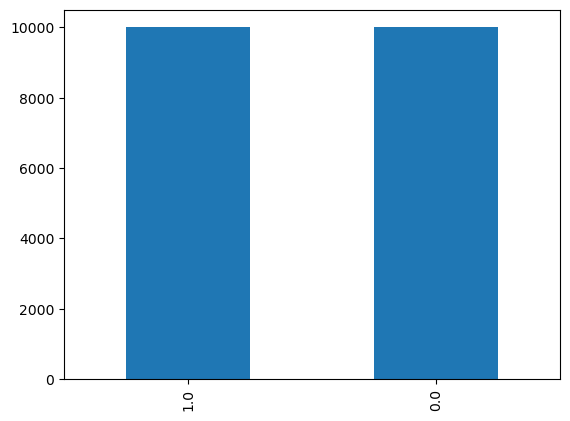

In [109]:
df_convert['IsBenign'].value_counts().plot(kind='bar')

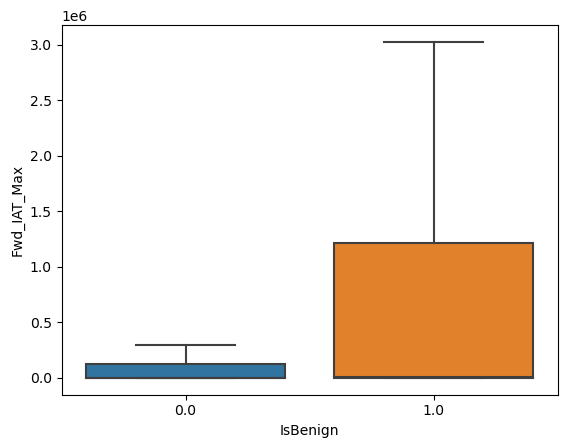

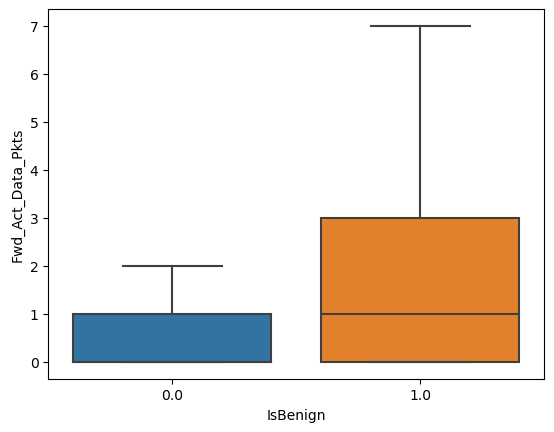

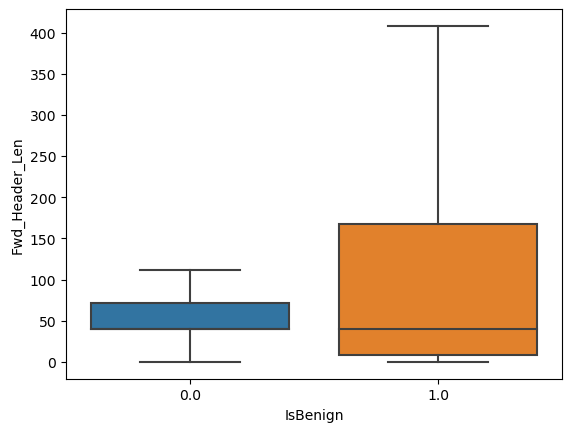

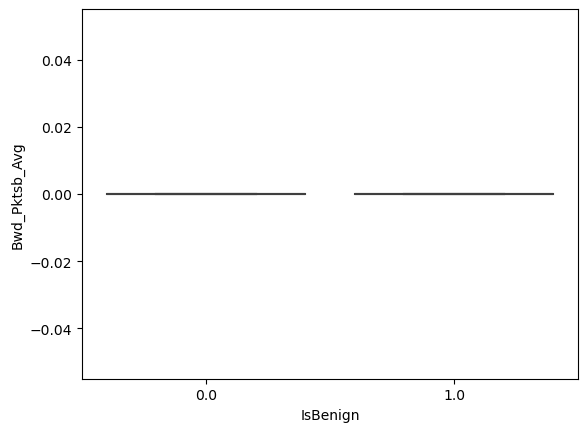

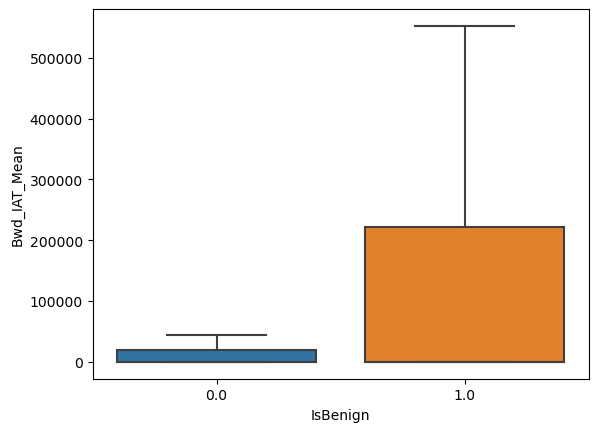

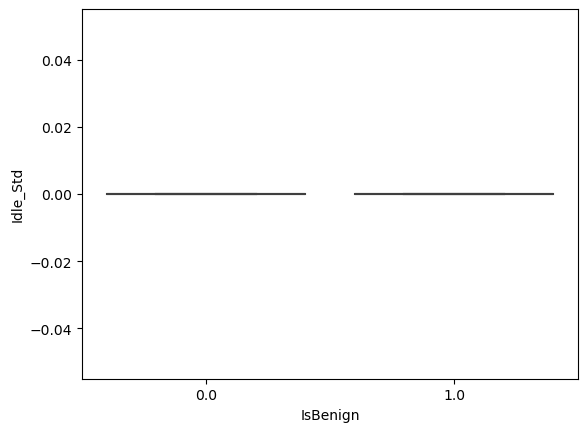

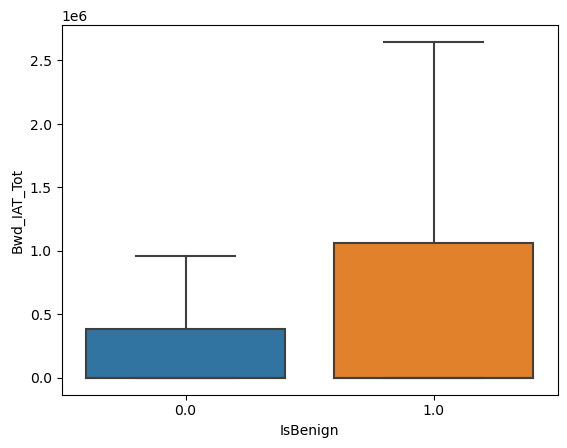

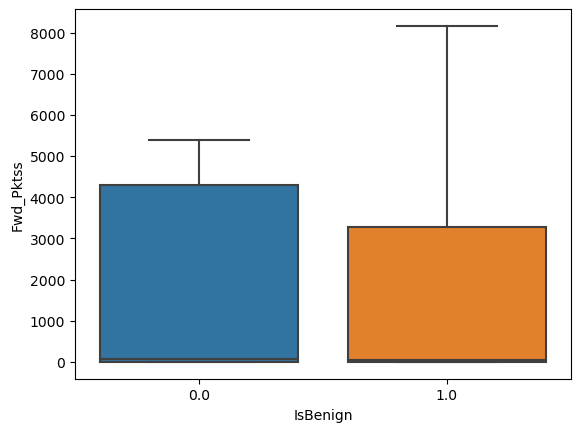

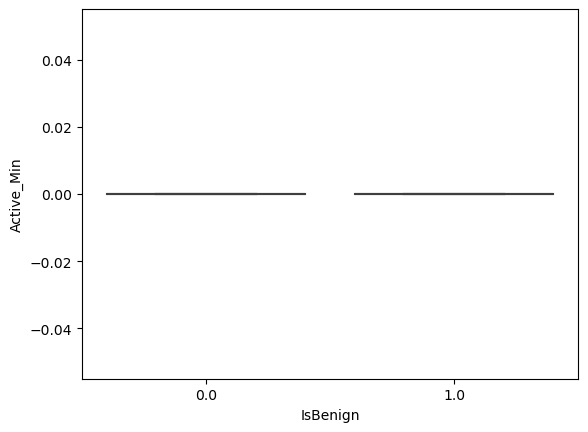

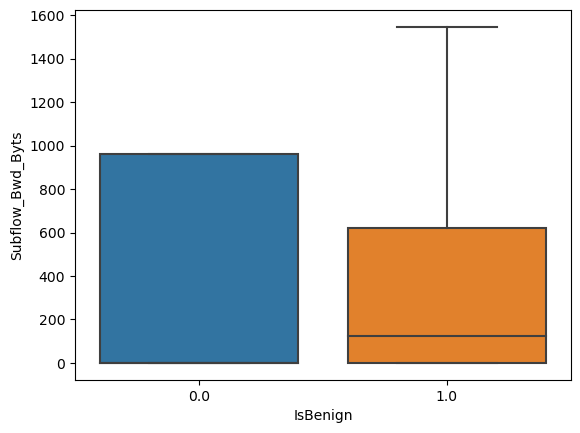

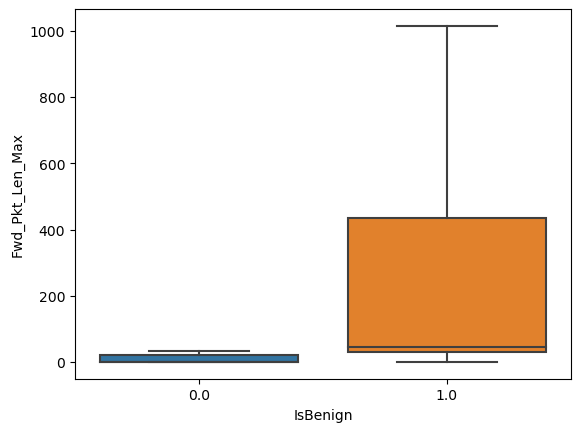

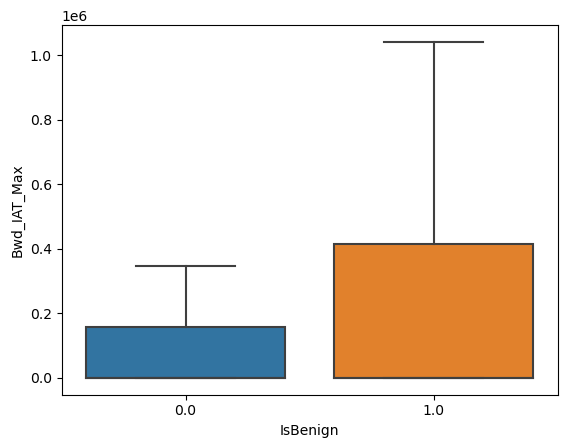

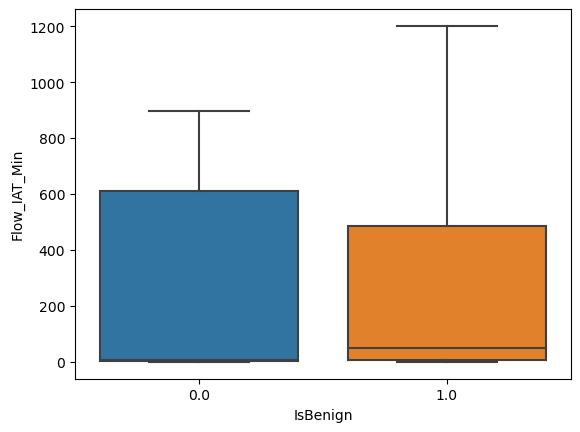

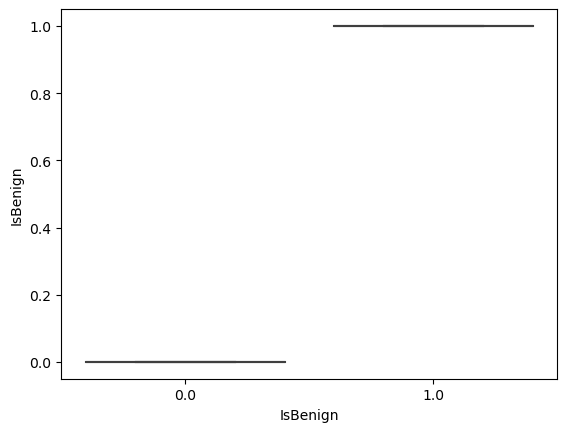

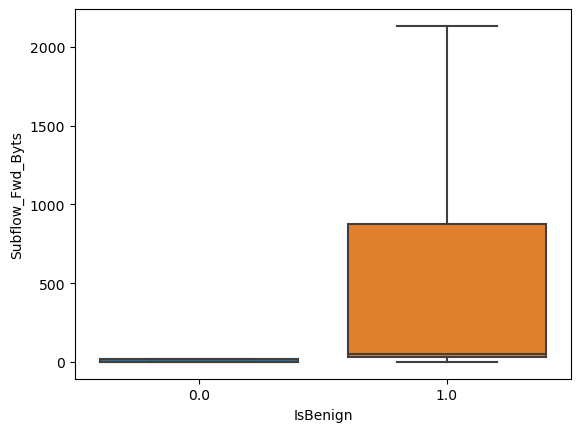

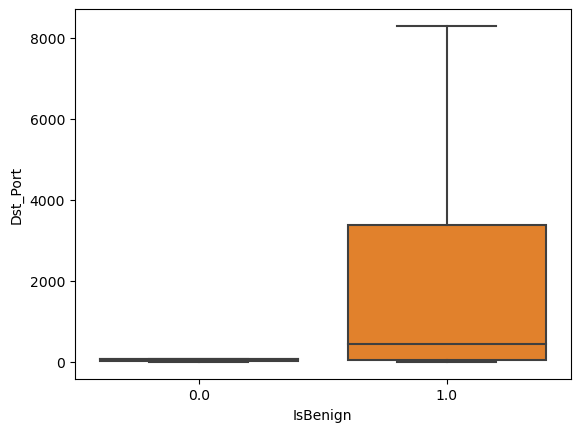

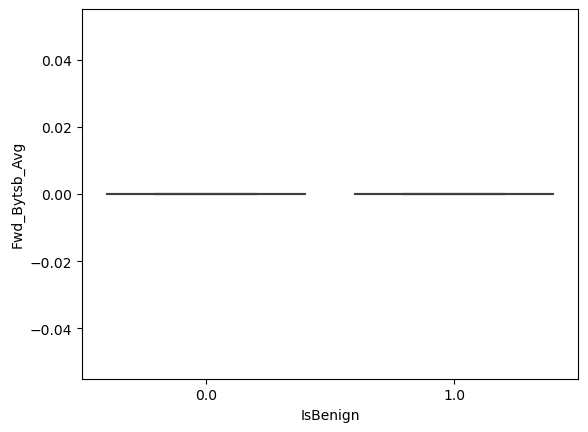

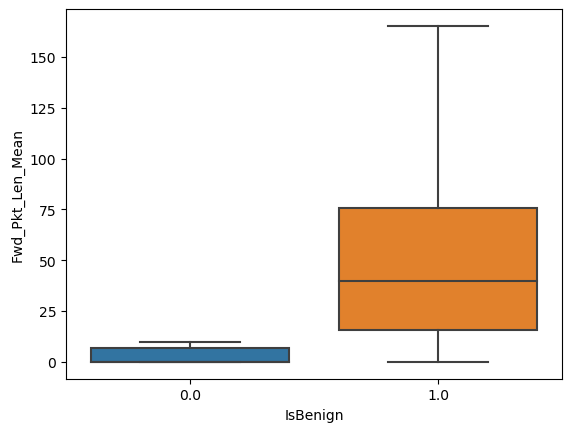

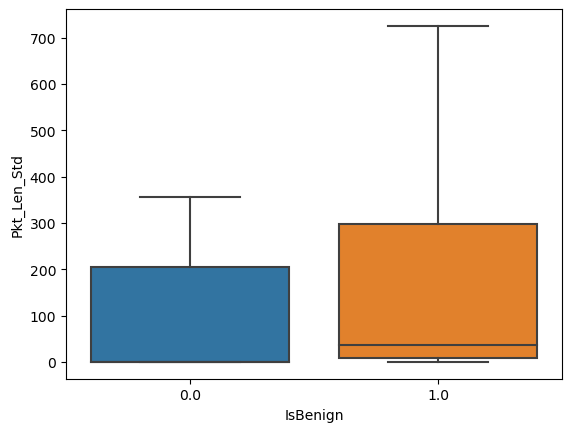

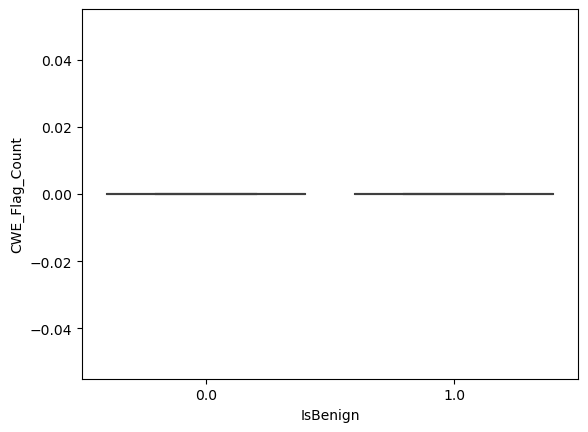

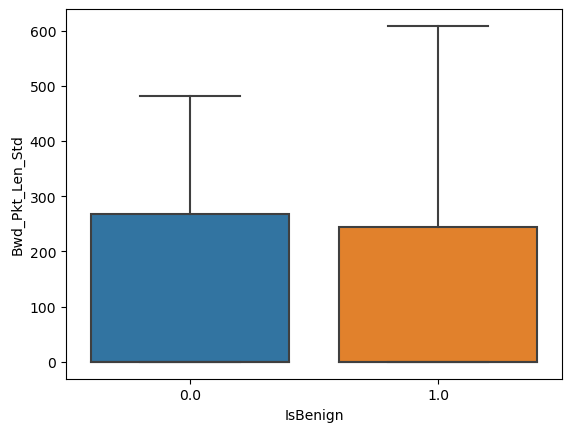

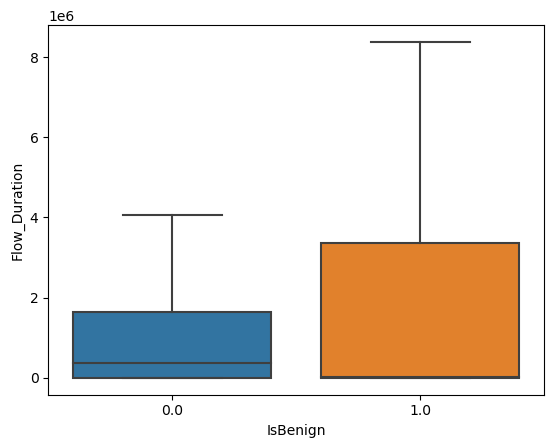

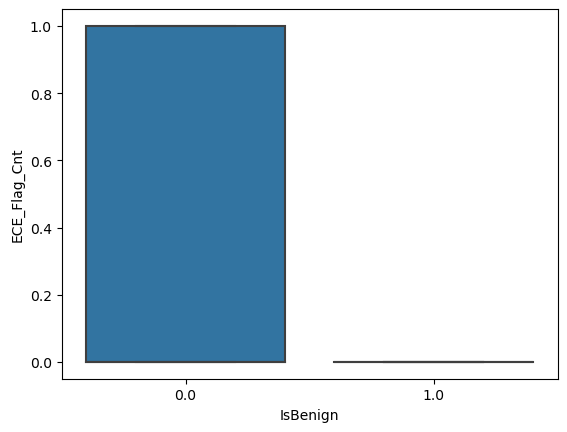

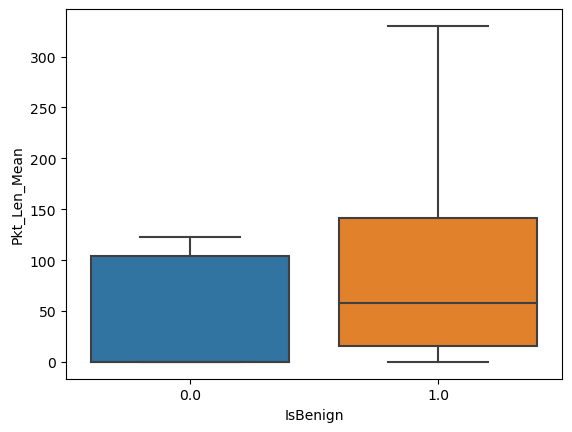

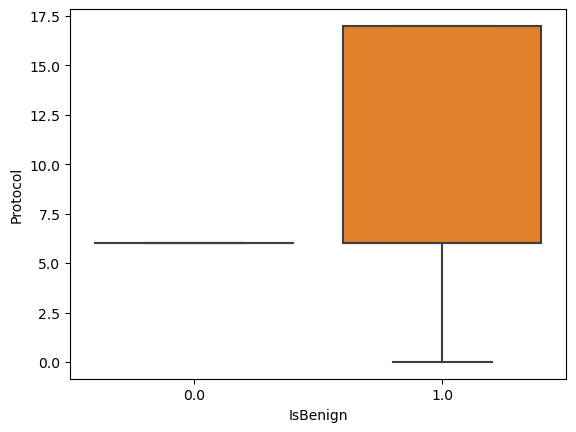

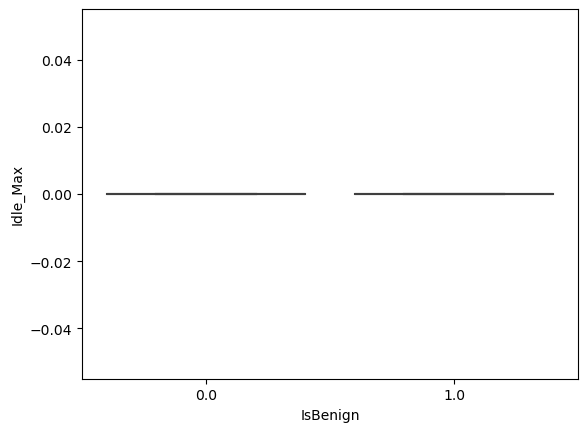

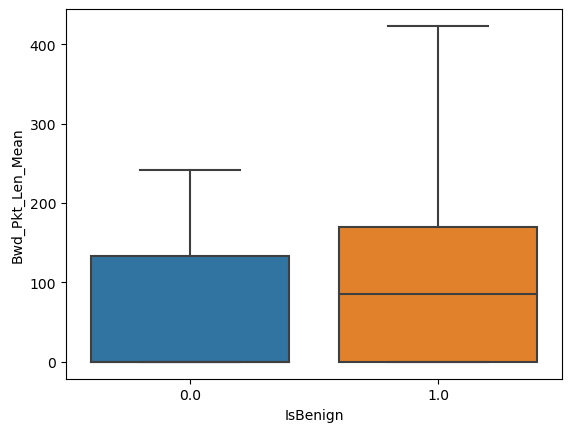

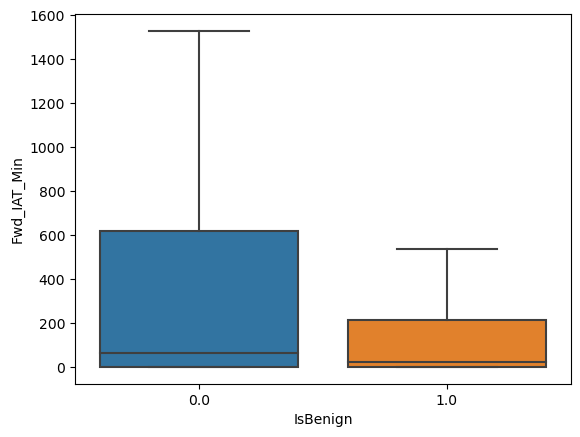

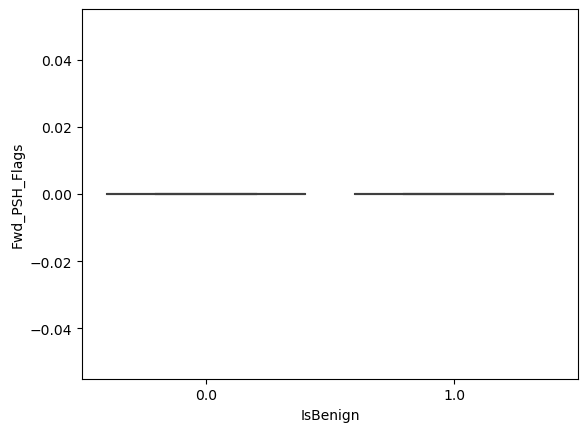

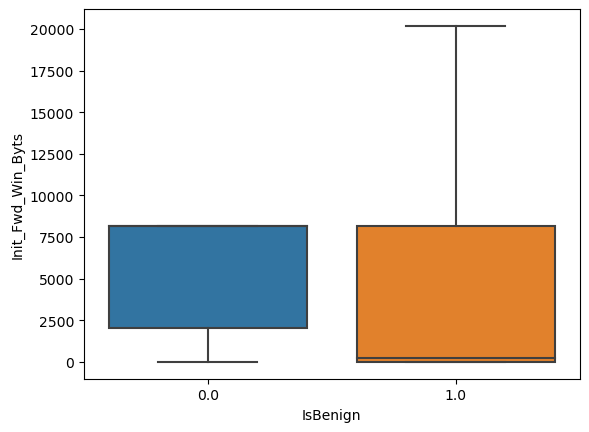

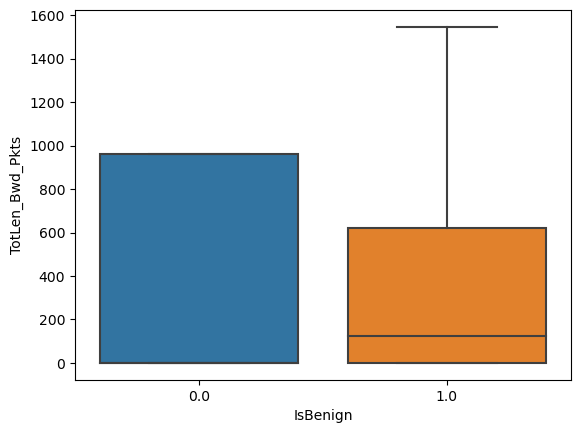

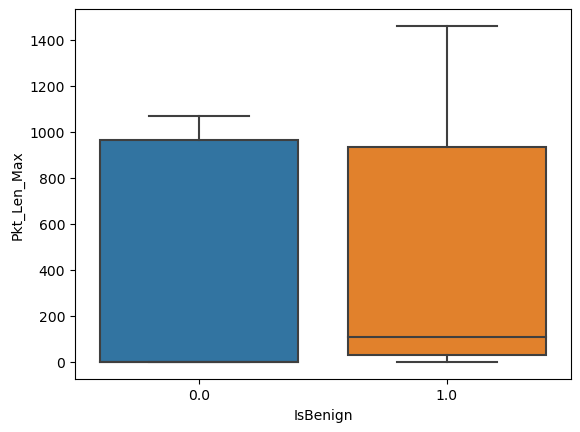

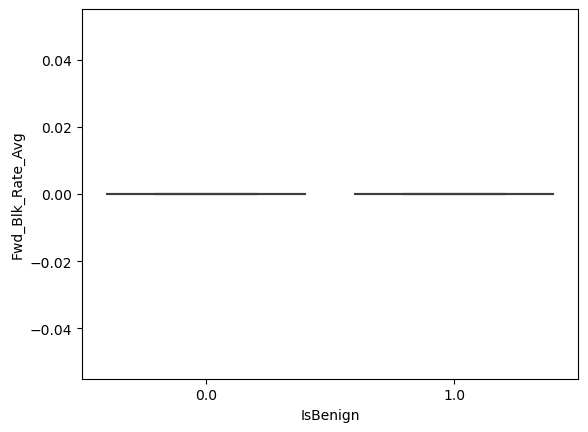

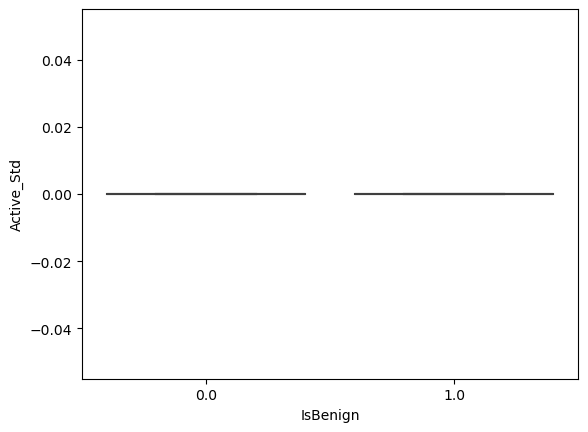

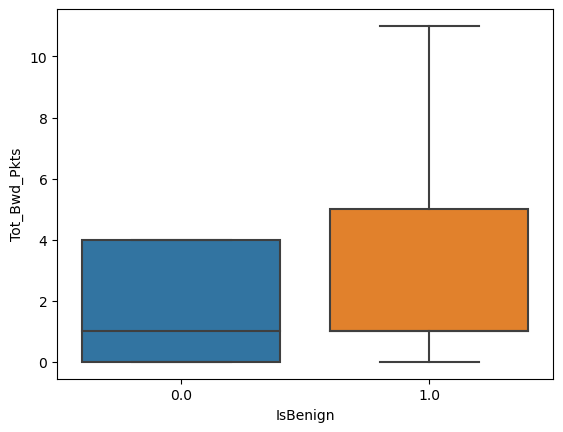

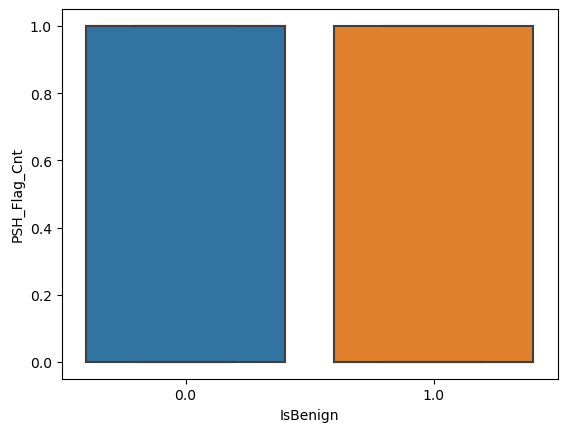

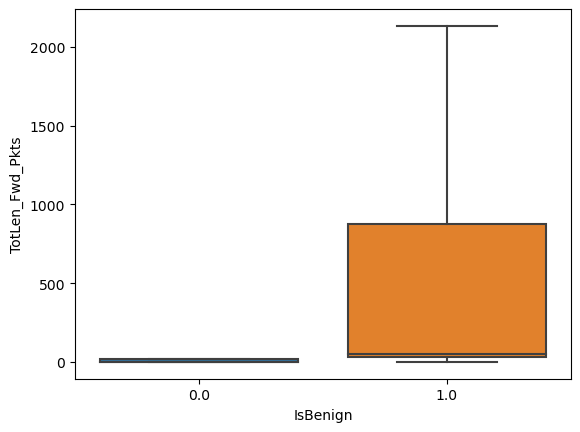

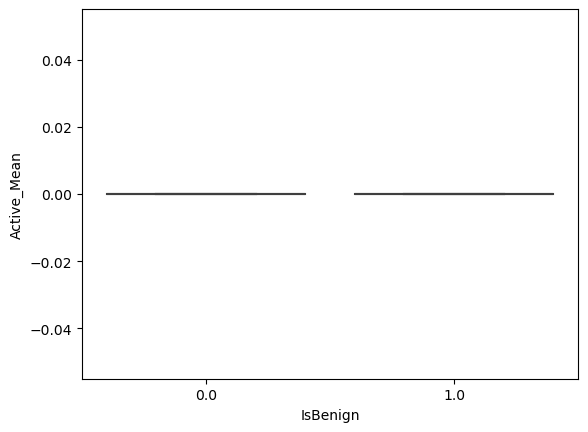

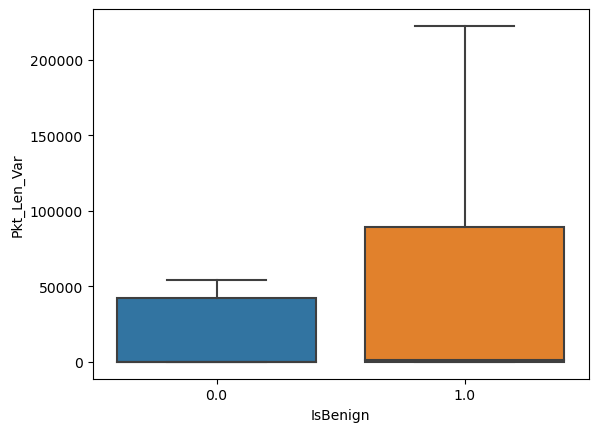

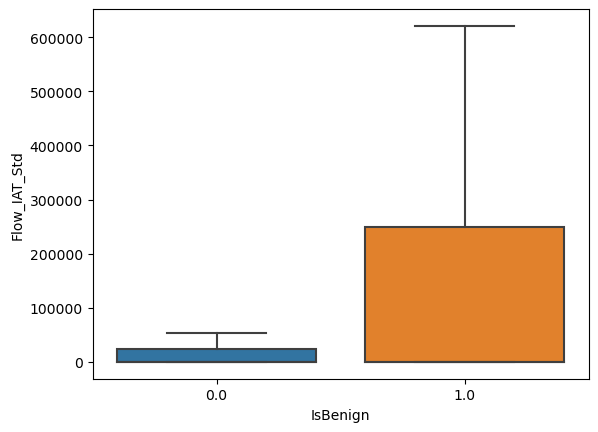

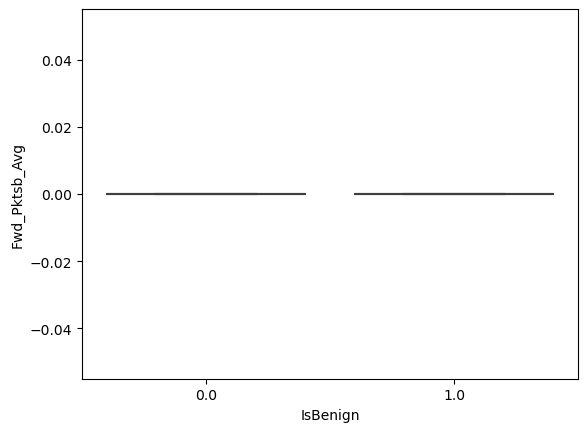

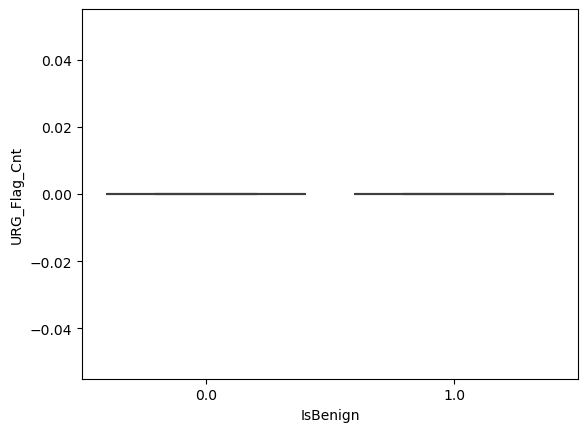

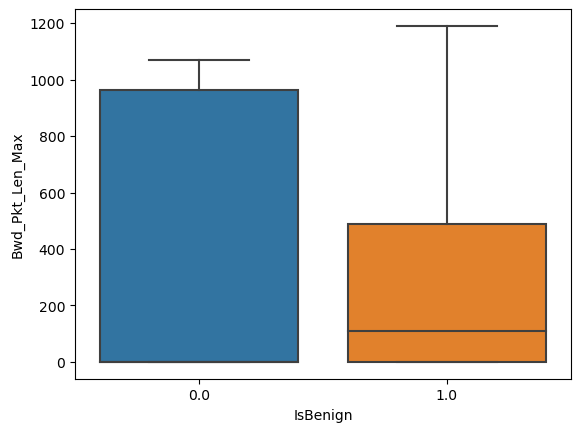

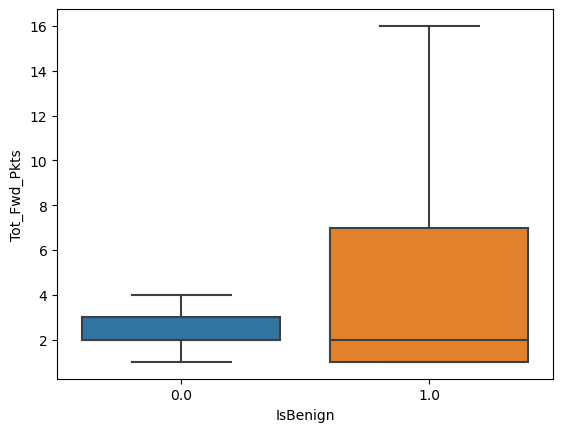

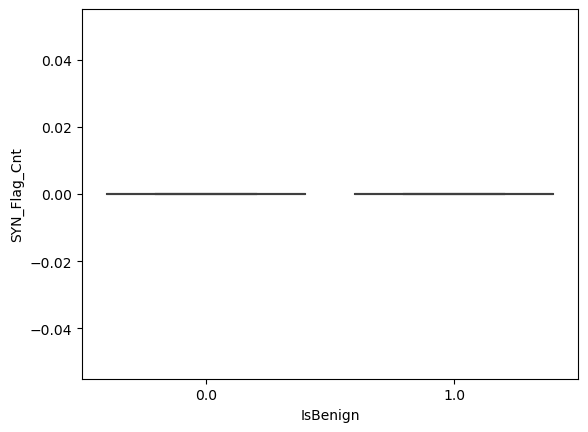

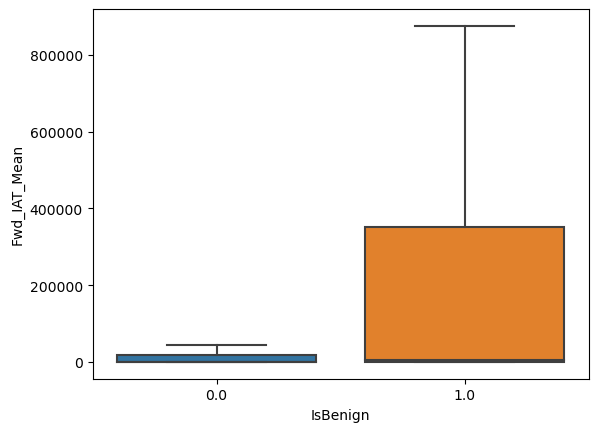

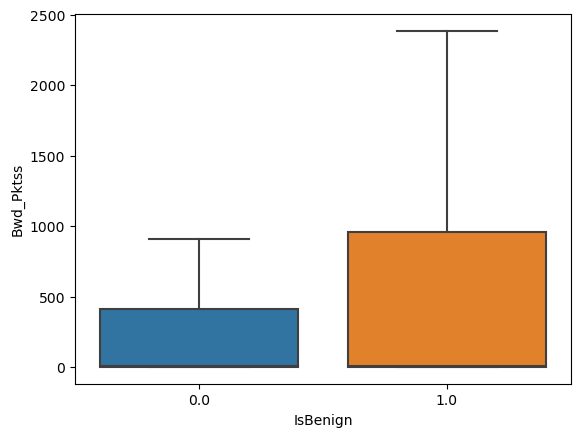

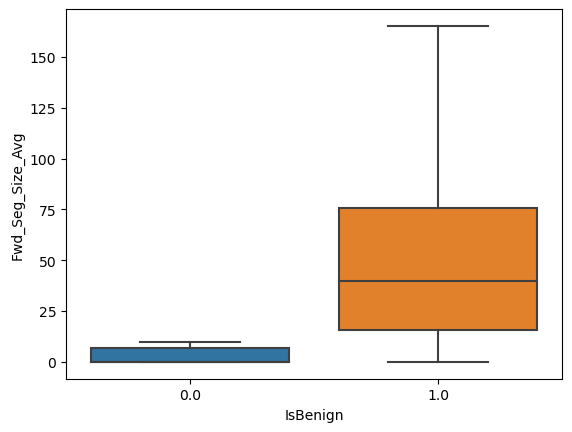

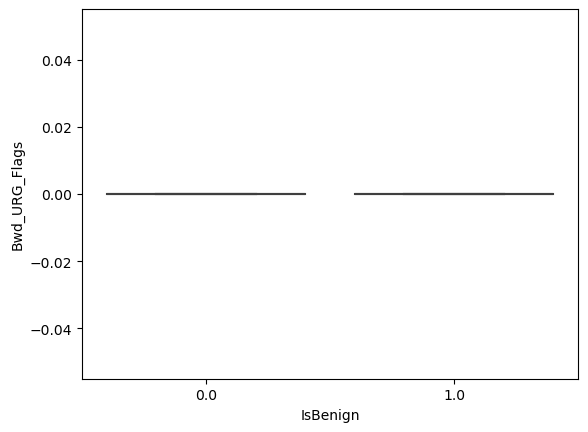

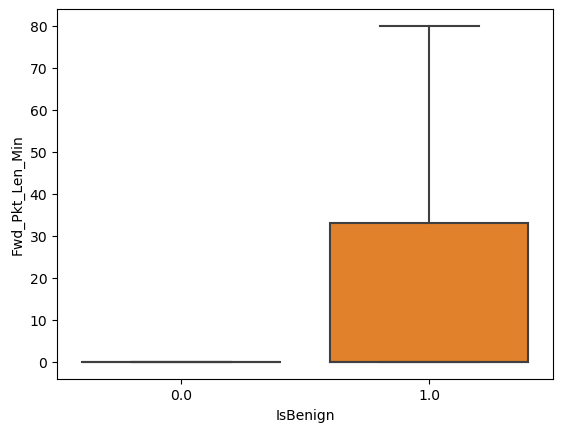

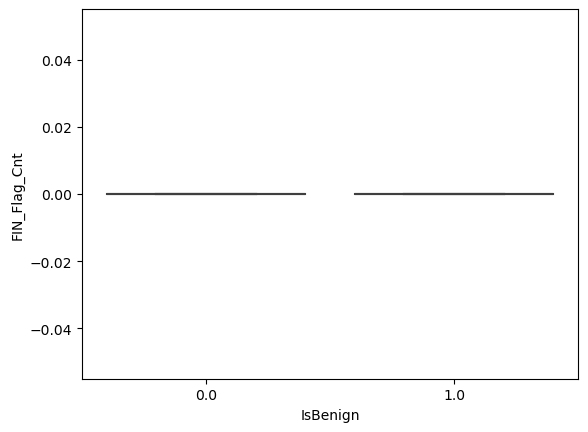

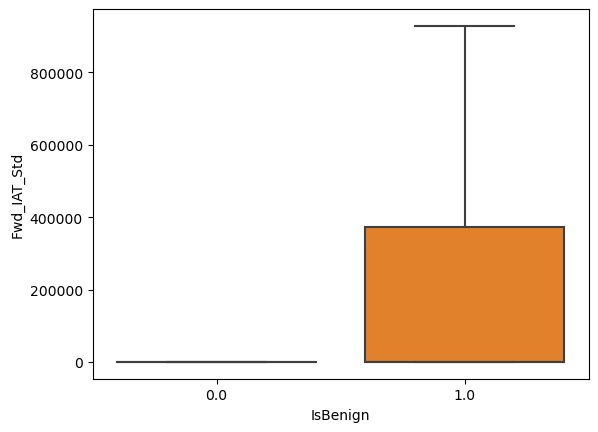

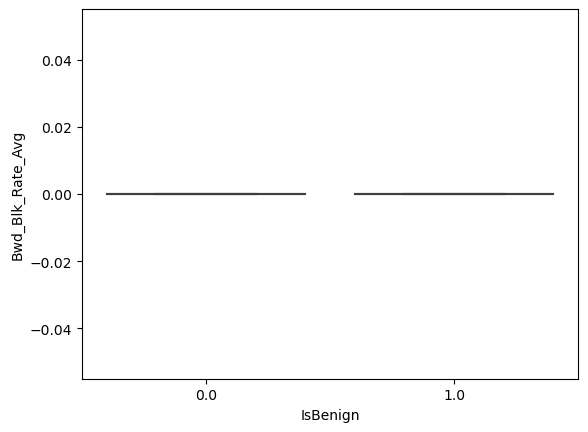

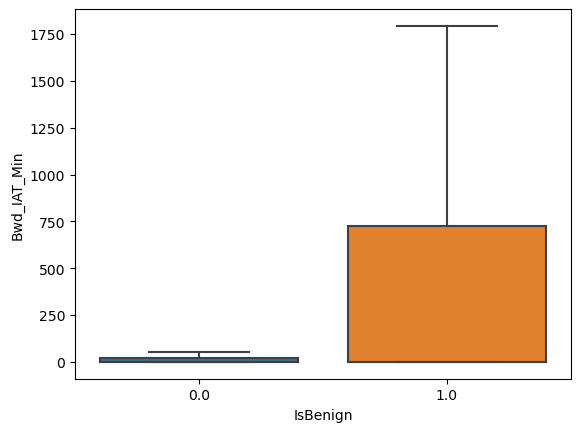

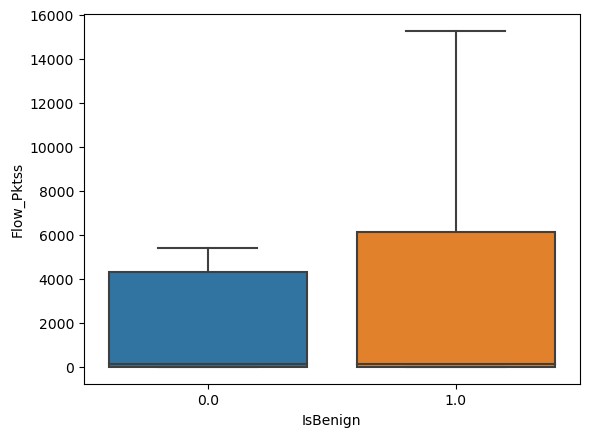

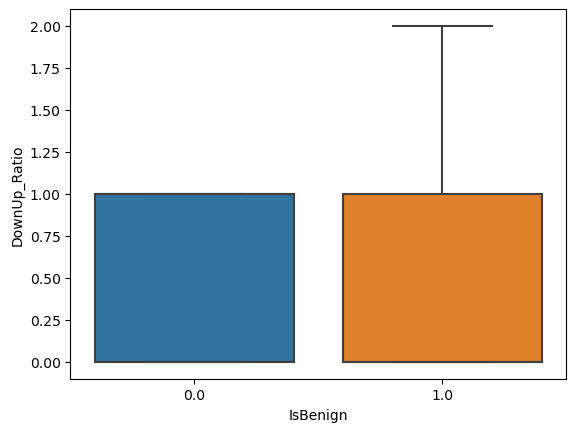

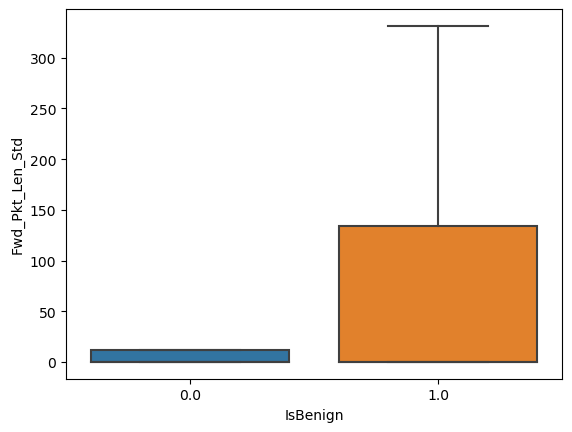

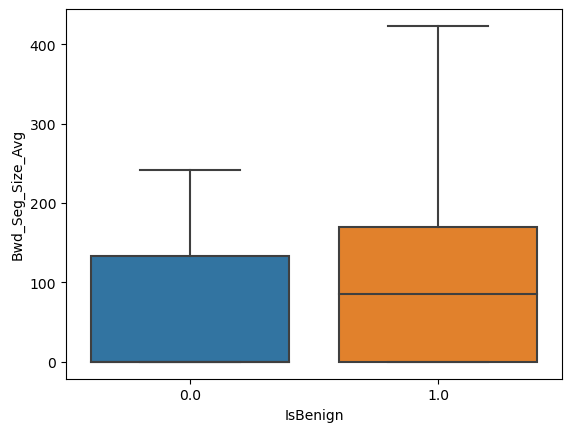

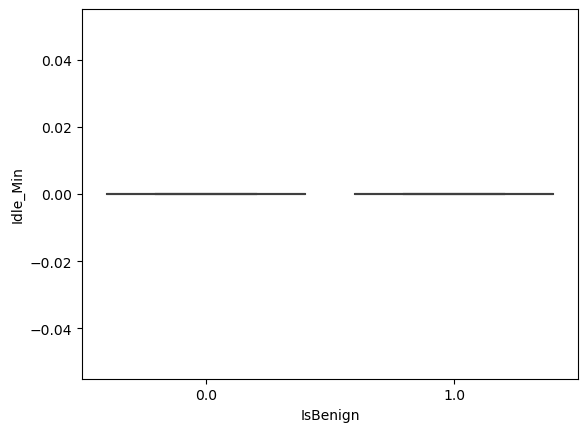

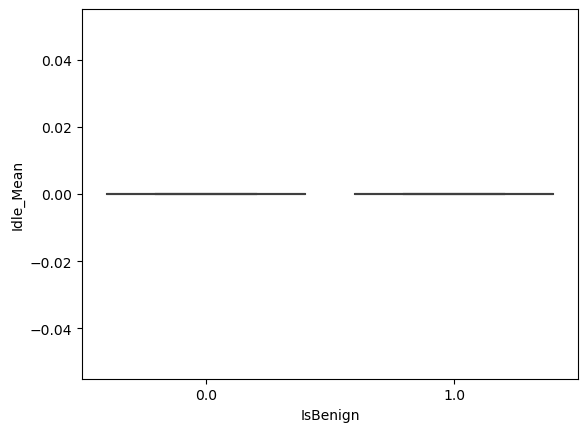

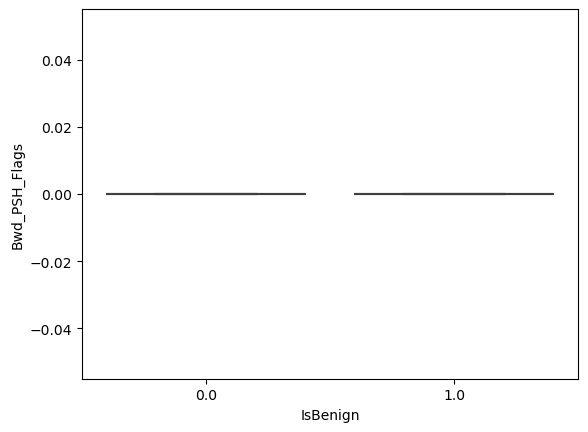

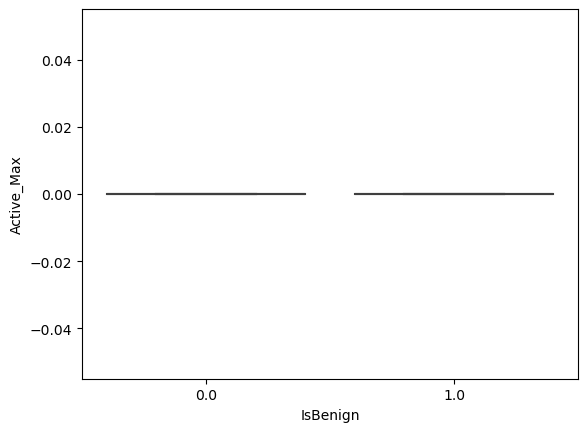

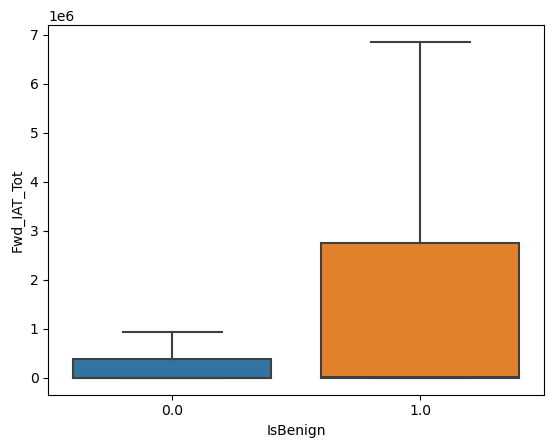

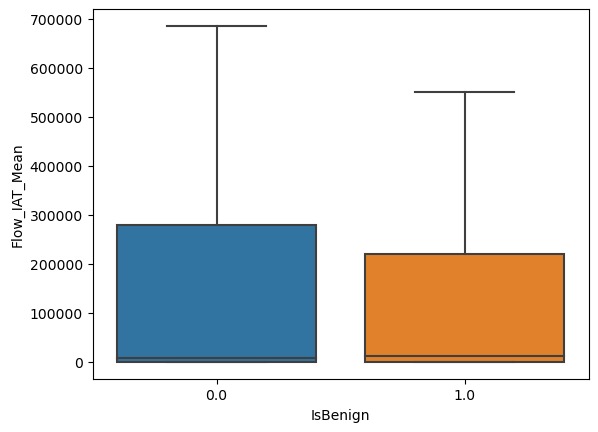

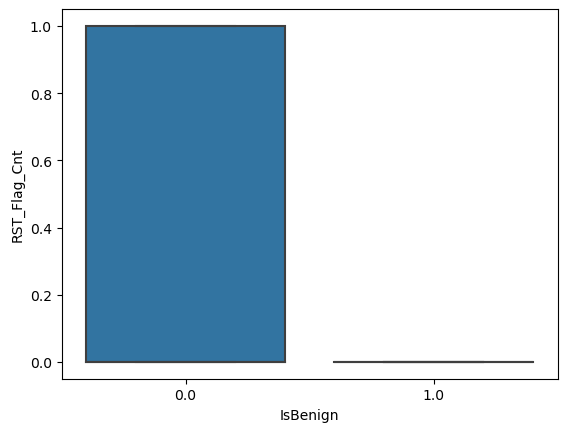

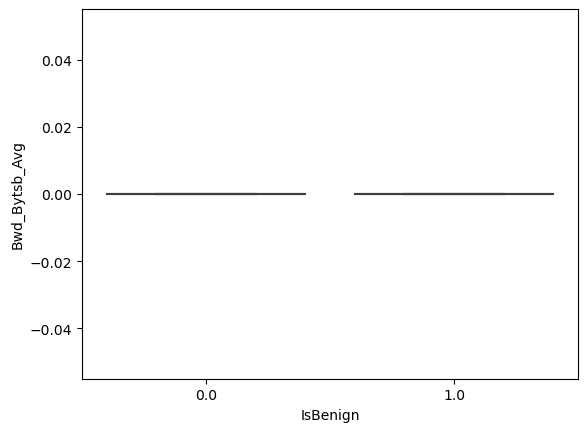

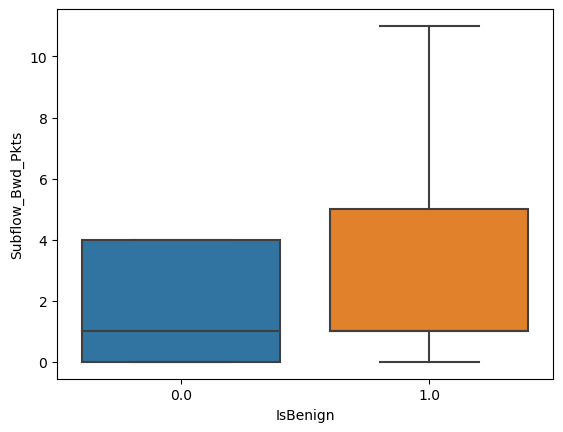

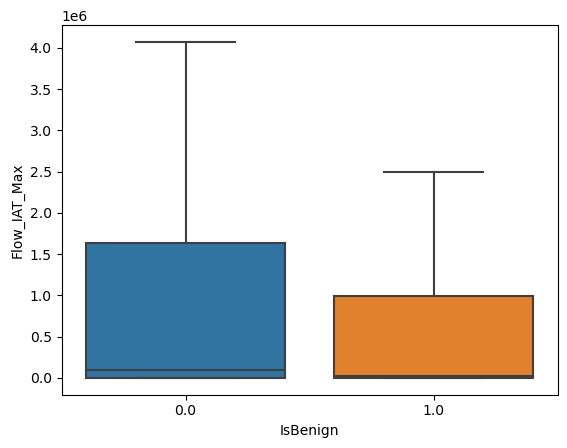

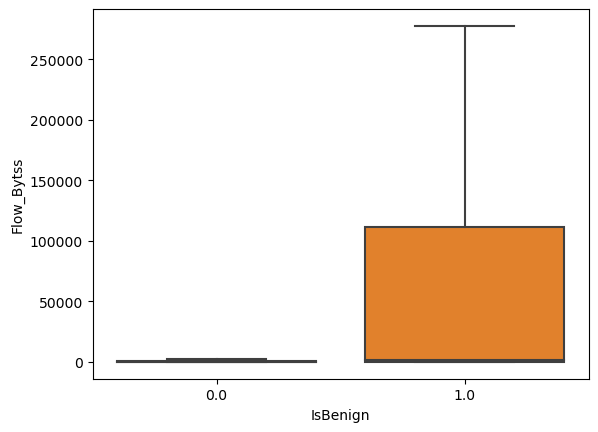

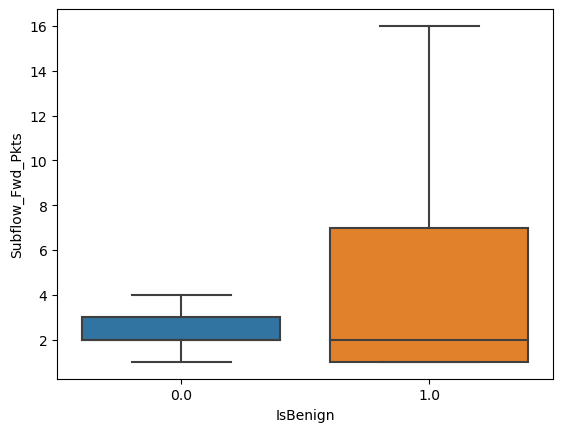

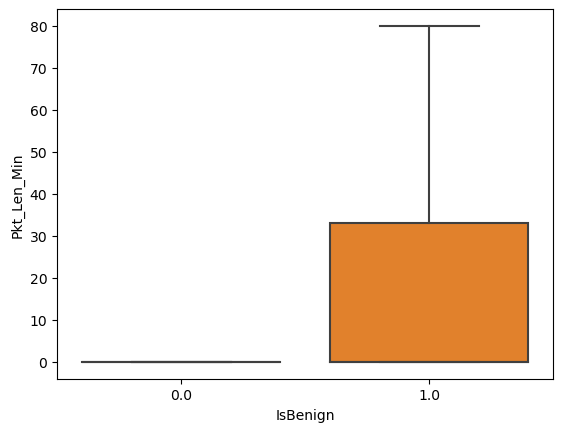

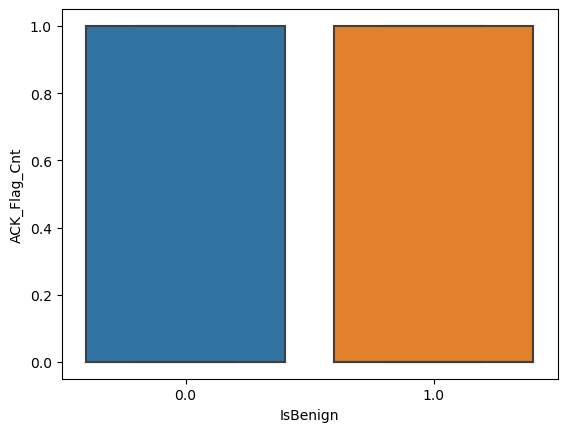

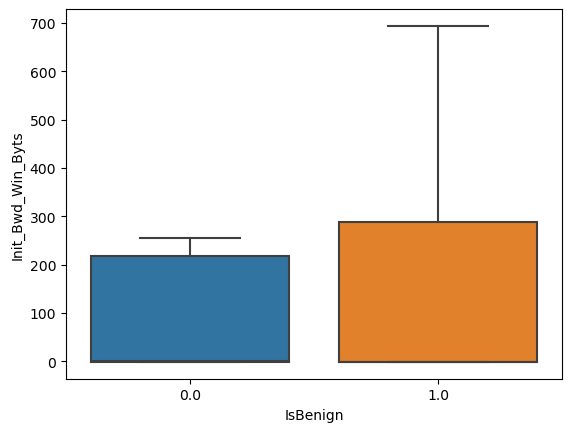

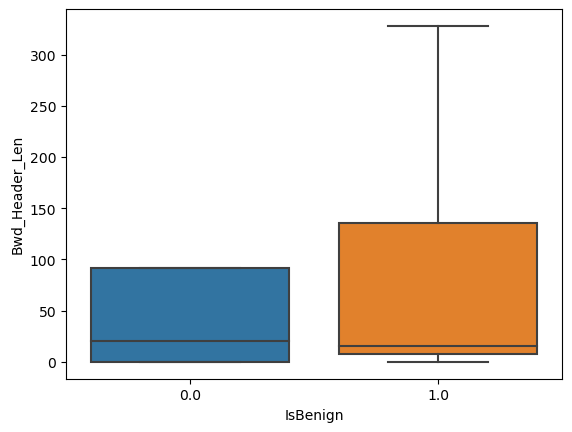

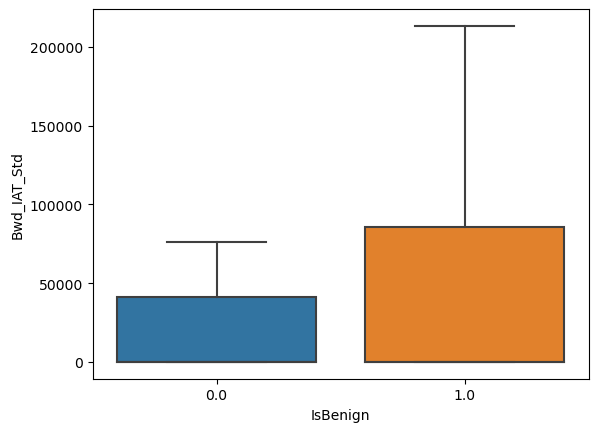

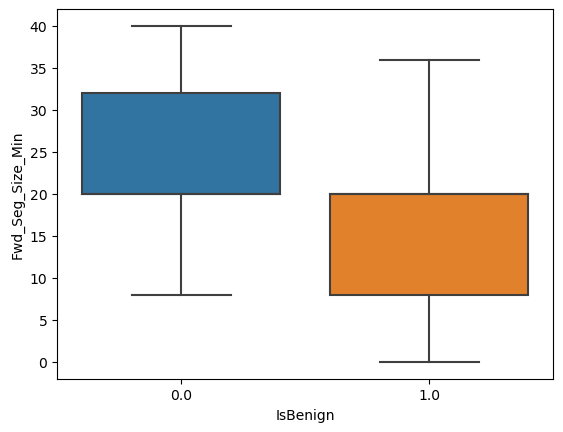

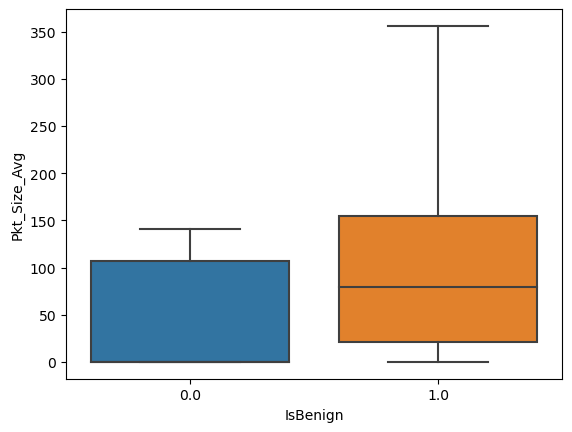

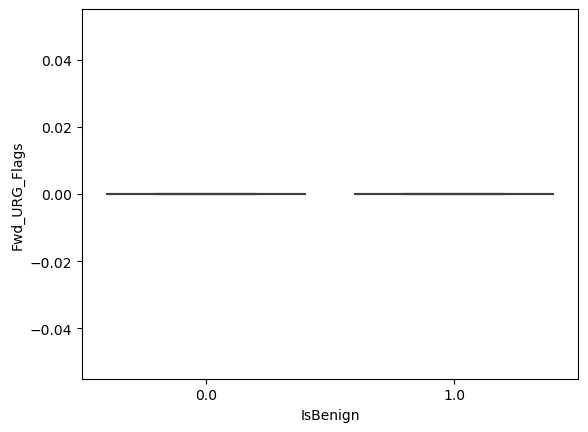

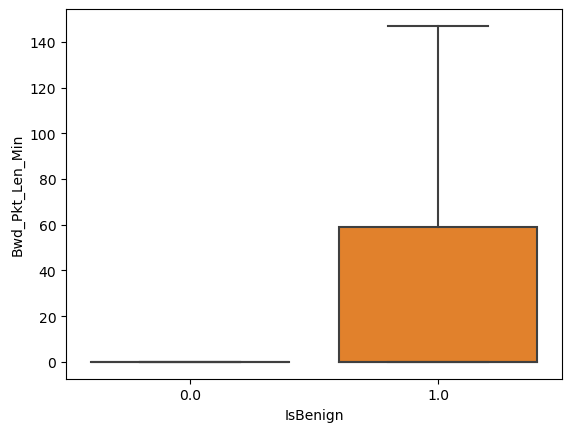

In [110]:
import seaborn as sns

for i in df_convert.columns:
    sns.boxplot(data=df_convert, y=i, x="IsBenign", showfliers=False) #sem outliers
    plt.show()


In [111]:
# Split base para treino (70%) e teste (30%)

data = df_convert[np.isfinite(df_convert).all(1)]

X_original = data.loc[:, data.columns != 'IsBenign']
y_original = data.loc[:, data.columns == 'IsBenign']

X_train, X_test_original_train, y_train, y_test_original_train = train_test_split(X_original, y_original, test_size=0.3, random_state=0)

y_original = y_original.astype('int')

In [112]:
X_train.shape

(13948, 78)

In [113]:
X_test_original_train.shape

(5979, 78)

In [114]:
# Treinar modelo classificador (Regressão Logistica, Random Forest, SVG, Multi Layer Perceptron, KNN)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(max_iter=2000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test_original_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              Feature  Importance
50        Fwd_IAT_Std    0.000020
38       Flow_IAT_Std    0.000020
4        Bwd_IAT_Mean    0.000029
73        Bwd_IAT_Std    0.000034
71  Init_Bwd_Win_Byts    0.000036
7           Fwd_Pktss    0.000046
14           Dst_Port    0.000046
45          Bwd_Pktss    0.000050
52        Bwd_IAT_Min    0.000051
28  Init_Fwd_Win_Byts    0.000057


<AxesSubplot:ylabel='Feature'>

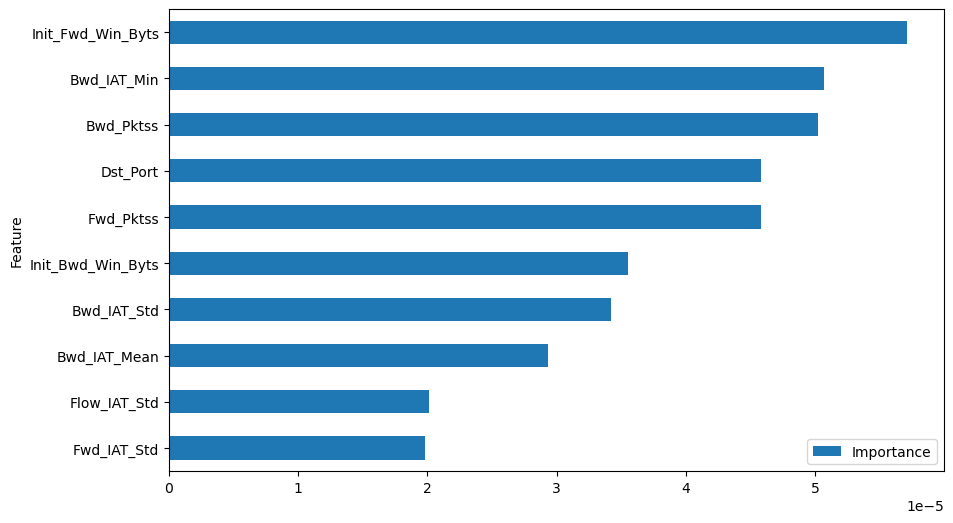

In [115]:
#Top 10 features

coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)[-10:]
print(feature_importance[-10:])
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [116]:
# Validar modelo: Calcular Precisão, Recall, curva ROC e AUC da curva, Matriz de Confusão
from sklearn.metrics import confusion_matrix

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_original_train, y_test_original_train)))
confusion_matrix = confusion_matrix(y_test_original_train, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.83
[[2226  786]
 [ 210 2757]]


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test_original_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82      3012
         1.0       0.78      0.93      0.85      2967

    accuracy                           0.83      5979
   macro avg       0.85      0.83      0.83      5979
weighted avg       0.85      0.83      0.83      5979



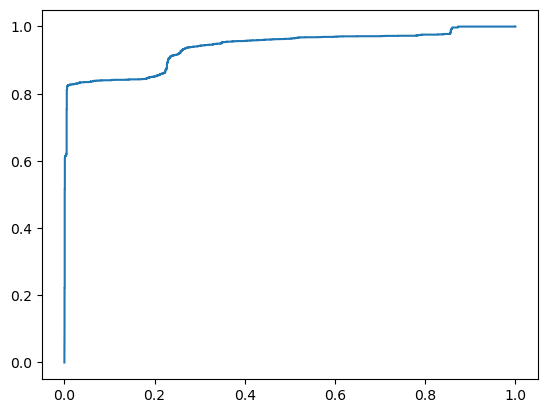

In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_original_train, logreg.predict(X_test_original_train))
fpr, tpr, thresholds = roc_curve(y_test_original_train, logreg.predict_proba(X_test_original_train)[:,1])

#logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
#fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression' % logit_roc_auc)

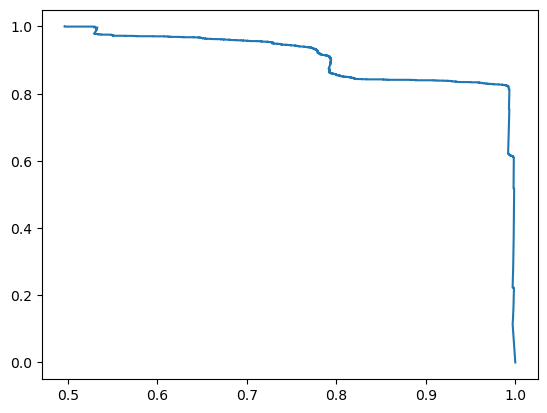

In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve
#logit_roc_auc = roc_auc_score(y_test_original_train, logreg.predict(X_test_original_train))
fpr, tpr, thresholds = precision_recall_curve(y_test_original_train, logreg.predict_proba(X_test_original_train)[:,1])

#logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
#fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression PR' % logit_roc_auc)

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

/tmp/ipykernel_153/1693566867.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

In [121]:
y_pred = rf.predict(X_test_original_train)
accuracy = accuracy_score(y_test_original_train, y_pred)
precision = precision_score(y_test_original_train, y_pred)
recall = recall_score(y_test_original_train, y_pred)
f1 = f1_score(y_test_original_train,y_pred)

print(f"accuracy:{accuracy}")
print(f"precision:{precision}")
print(f"recall:{recall}")
print(f"f1:{f1}")

accuracy:0.9979929754139488
precision:0.997307303938068
recall:0.9986518368722616
f1:0.9979791175479958


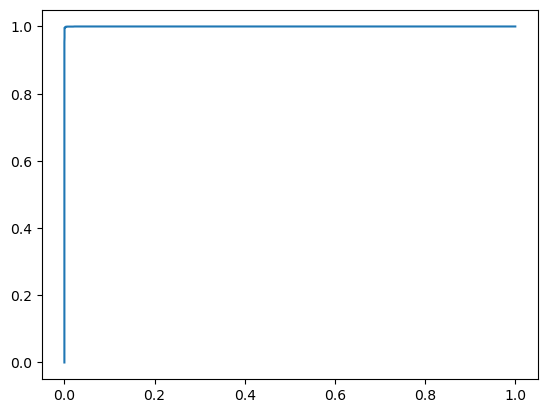

In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_original_train, rf.predict(X_test_original_train))
fpr, tpr, thresholds = roc_curve(y_test_original_train, rf.predict_proba(X_test_original_train)[:,1])

#logit_roc_auc_train = roc_auc_score(y_train, rf.predict(X_train))
#fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest' % logit_roc_auc)

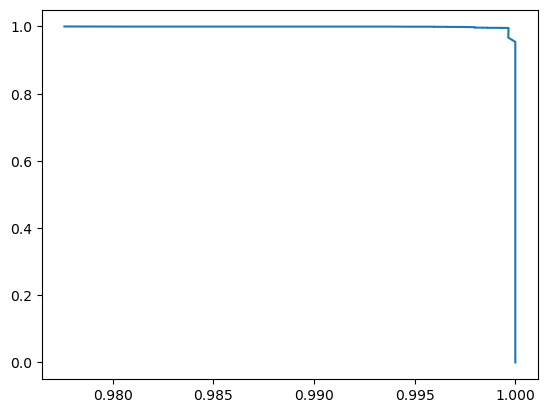

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve
#logit_roc_auc = roc_auc_score(y_test_original_train, logreg.predict(X_test_original_train))
fpr, tpr, thresholds = precision_recall_curve(y_test_original_train, rf.predict_proba(X_test_original_train)[:,1])

#logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
#fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression PR' % logit_roc_auc)

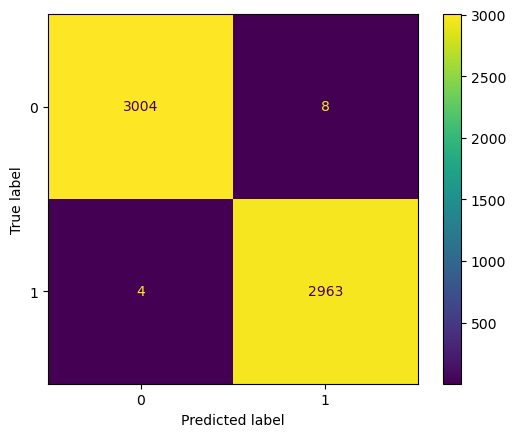

In [124]:
cm = confusion_matrix(y_test_original_train, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [125]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test_original_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test_original_train,predict_test))
print(classification_report(y_test_original_train,predict_test))

[[2323  689]
 [ 337 2630]]
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      3012
         1.0       0.79      0.89      0.84      2967

    accuracy                           0.83      5979
   macro avg       0.83      0.83      0.83      5979
weighted avg       0.83      0.83      0.83      5979



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_original_train, mlp.predict(X_test_original_train))
fpr, tpr, thresholds = roc_curve(y_test_original_train, mlp.predict_proba(X_test_original_train)[:,1])

#logit_roc_auc_train = roc_auc_score(y_train, rf.predict(X_train))
#fpr_train, tpr_train, thresholds_train = roc_curve(y_train, rf.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP' % logit_roc_auc)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve
#logit_roc_auc = roc_auc_score(y_test_original_train, logreg.predict(X_test_original_train))
fpr, tpr, thresholds = precision_recall_curve(y_test_original_train, mlp.predict_proba(X_test_original_train)[:,1])

#logit_roc_auc_train = roc_auc_score(y_train, logreg.predict(X_train))
#fpr_train, tpr_train, thresholds_train = roc_curve(y_train, logreg.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression PR' % logit_roc_auc)